# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [228]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [229]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load files

LAM output analysis.

Simu irr et simu no-irr.

## Area and period selection

In [230]:
# lon_min=-13
# lon_max=6
# lat_min=32
# lat_max=49

date_min = '1985-01-01'
date_max = '2014-12-31'

## Sims

In [231]:
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/future_FC/pres_noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/future_FC/pres_irr'

fut_noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/future_FC/fut_noirr'
fut_irr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/future_FC/fut_irr'

In [232]:
def format_ORC_MO(filename, name, color, lon_min, lon_max, lat_min, lat_max):
    ds =  xr.open_mfdataset(filename)
    ds = ds.rename({'time_counter':'time'})
    ds.attrs['name'] = name
    ds.attrs['plot_color'] = color
    ds = ds.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

    ds['snowmelt'] = ds['snowmelt'] * 24 * 3600
    ds['snowmelt'].attrs['units'] = 'mm d⁻¹'

    ds['snow_contrib'] = ds['snowmelt'] / (ds['snowmelt'] + ds['rain']) * 100
    ds['snow_contrib'].attrs['units'] = '%'

    ds['precip'] = ds['rain'] + ds['snowf']
    ds['precip'].attrs['units'] = 'mm d⁻¹'

    ds.attrs['history'] = ''

    return ds

In [233]:
#open netcdf files
filename = '{}/SRF/TEST-amip-LAMCM7onlyirr.1n-85_*_1M_sechiba_history.nc'.format(noirr_dir)

pres_noirr = format_ORC_MO(filename, 'pres_noirr', 'red',
                         lon_min, lon_max, lat_min, lat_max)

pres_noirr

<xarray.Dataset> Size: 5GB
Dimensions:               (time: 360, axis_nbounds: 2, lat: 85, lon: 133,
                           veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                           solay: 11, snowlev: 3)
Coordinates:
  * lat                   (lat) float32 340B 35.53 35.63 35.73 ... 43.87 43.97
  * lon                   (lon) float32 532B -9.94 -9.834 -9.729 ... 3.884 3.99
  * veget                 (veget) float32 60B 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp               (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                 (solth) float32 72B 0.0004888 0.001955 ... 33.53 65.56
  * nobio                 (nobio) float32 4B 1.0
  * solay                 (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev               (snowlev) float32 12B 1.0 2.0 3.0
    time_centered         (time) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 3kB 1985-01-16T12:00:00 ... 2...
Dimensions without coordinates: axis_nbounds
Data variables: (12/80)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                 (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    Contfrac              (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    swnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    lwnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    ...                    ...
    snowmelt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    tot_melt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    snowdz                (time, snowlev, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    humtot_soil           (time, soiltyp, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    snow_contrib          (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    precip                (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
Attributes:
    name:         pres_noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Sep-09 15:16:02 GMT
    uuid:         9d7cb0f2-d7bb-47b0-83d9-eff6545bb5fb
    history:      
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    plot_color:   red

In [234]:
#open netcdf files
filename = '{}/SRF/TEST-amip-LAMCM7onlyirr.1-85_*_1M_sechiba_history.nc'.format(irr_dir)

pres_irr = format_ORC_MO(filename, 'pres_irr', 'blue',
                         lon_min, lon_max, lat_min, lat_max)

pres_irr

<xarray.Dataset> Size: 5GB
Dimensions:               (time: 360, axis_nbounds: 2, lat: 85, lon: 133,
                           veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                           solay: 11, snowlev: 3)
Coordinates:
  * lat                   (lat) float32 340B 35.53 35.63 35.73 ... 43.87 43.97
  * lon                   (lon) float32 532B -9.94 -9.834 -9.729 ... 3.884 3.99
  * veget                 (veget) float32 60B 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp               (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                 (solth) float32 72B 0.0004888 0.001955 ... 33.53 65.56
  * nobio                 (nobio) float32 4B 1.0
  * solay                 (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev               (snowlev) float32 12B 1.0 2.0 3.0
    time_centered         (time) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 3kB 1985-01-16T12:00:00 ... 2...
Dimensions without coordinates: axis_nbounds
Data variables: (12/90)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                 (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    Contfrac              (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    swnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    lwnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    ...                    ...
    snowmelt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    tot_melt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    snowdz                (time, snowlev, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    humtot_soil           (time, soiltyp, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    snow_contrib          (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    precip                (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
Attributes:
    name:         pres_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Sep-08 11:05:11 GMT
    uuid:         e64419fc-b477-4bc5-9d74-4334b071938d
    history:      
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    plot_color:   blue

In [235]:
#open netcdf files
filename = '{}/SRF/TEST-amip-LAMCM7onlyirr.1n-F_*_1M_sechiba_history.nc'.format(fut_noirr_dir)

fut_noirr = format_ORC_MO(filename, 'fut_noirr', 'red',
                         lon_min, lon_max, lat_min, lat_max)
fut_noirr

<xarray.Dataset> Size: 5GB
Dimensions:               (time: 360, axis_nbounds: 2, lat: 85, lon: 133,
                           veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                           solay: 11, snowlev: 3)
Coordinates:
  * lat                   (lat) float32 340B 35.53 35.63 35.73 ... 43.87 43.97
  * lon                   (lon) float32 532B -9.94 -9.834 -9.729 ... 3.884 3.99
  * veget                 (veget) float32 60B 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp               (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                 (solth) float32 72B 0.0004888 0.001955 ... 33.53 65.56
  * nobio                 (nobio) float32 4B 1.0
  * solay                 (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev               (snowlev) float32 12B 1.0 2.0 3.0
    time_centered         (time) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 3kB 2048-01-16T12:00:00 ... 2...
Dimensions without coordinates: axis_nbounds
Data variables: (12/80)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                 (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    Contfrac              (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    swnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    lwnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    ...                    ...
    snowmelt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    tot_melt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    snowdz                (time, snowlev, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    humtot_soil           (time, soiltyp, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    snow_contrib          (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    precip                (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
Attributes:
    name:         fut_noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Sep-09 16:08:33 GMT
    uuid:         ccf419c0-f267-4295-8f55-ac6e9d63bce6
    history:      
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    plot_color:   red

In [236]:
#open netcdf files
filename = '{}/SRF/TEST-amip-LAMCM7onlyirr.1-F_*_1M_sechiba_history.nc'.format(fut_irr_dir)

fut_irr = format_ORC_MO(filename, 'fut_irr', 'blue',
                         lon_min, lon_max, lat_min, lat_max)
fut_irr

<xarray.Dataset> Size: 5GB
Dimensions:               (time: 360, axis_nbounds: 2, lat: 85, lon: 133,
                           veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                           solay: 11, snowlev: 3)
Coordinates:
  * lat                   (lat) float32 340B 35.53 35.63 35.73 ... 43.87 43.97
  * lon                   (lon) float32 532B -9.94 -9.834 -9.729 ... 3.884 3.99
  * veget                 (veget) float32 60B 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp               (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                 (solth) float32 72B 0.0004888 0.001955 ... 33.53 65.56
  * nobio                 (nobio) float32 4B 1.0
  * solay                 (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev               (snowlev) float32 12B 1.0 2.0 3.0
    time_centered         (time) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 3kB 2048-01-16T12:00:00 ... 2...
Dimensions without coordinates: axis_nbounds
Data variables: (12/90)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                 (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    Contfrac              (time, lat, lon) float32 16MB dask.array<chunksize=(12, 85, 133), meta=np.ndarray>
    swnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    lwnet                 (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    ...                    ...
    snowmelt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    tot_melt              (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    snowdz                (time, snowlev, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    humtot_soil           (time, soiltyp, lat, lon) float32 49MB dask.array<chunksize=(1, 3, 85, 133), meta=np.ndarray>
    snow_contrib          (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
    precip                (time, lat, lon) float32 16MB dask.array<chunksize=(1, 85, 133), meta=np.ndarray>
Attributes:
    name:         fut_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2025-Sep-08 21:57:17 GMT
    uuid:         cd0a7c12-6a81-4048-ae6f-93e7a7a663f8
    history:      
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...
    plot_color:   blue

## Obs

In [237]:
filename = '../../../obs/GLEAMv4.1a/E/*'
gleam = xr.open_mfdataset(filename)
gleam.attrs['name'] = 'GLEAMv4.1a'
gleam.attrs['plot_color'] = 'black'
#restrict lon lat
gleam = gleam.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))

gleam['evap']=convert_mm_per_month_to_mm_per_day(gleam['E'])
gleam['evap'].attrs['units'] = 'mm d⁻¹'
gleam

<xarray.Dataset> Size: 22MB
Dimensions:  (time: 156, lat: 85, lon: 140)
Coordinates:
  * time     (time) datetime64[ns] 1kB 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 1kB -9.95 -9.85 -9.75 -9.65 ... 3.65 3.75 3.85 3.95
  * lat      (lat) float64 680B 43.95 43.85 43.75 43.65 ... 35.75 35.65 35.55
Data variables:
    E        (time, lat, lon) float32 7MB dask.array<chunksize=(4, 85, 140), meta=np.ndarray>
    evap     (time, lat, lon) float64 15MB dask.array<chunksize=(4, 85, 140), meta=np.ndarray>
Attributes:
    name:        GLEAMv4.1a
    plot_color:  black

In [238]:
#gpcc
filename='../../../obs/precips/precip.mon.total.0.25x0.25.v2020.nc'
gpcc0=xr.open_mfdataset(filename)
gpcc0.attrs['name'] = 'GPCC'
gpcc=gpcc0.sel(time=slice(date_min,date_max))
gpcc['lon'] = ((gpcc['lon'] + 180) % 360) - 180
gpcc1 = gpcc.sortby('lon')

gpcc=gpcc1.sel(lon=slice(-13,6.25),lat=slice(lat_max, lat_min))

gpcc.attrs["plot_color"] = 'black'

gpcc['precip'] = convert_mm_per_month_to_mm_per_day(gpcc['precip'])
gpcc['precip'].attrs['units'] = 'mm d⁻¹'
gpcc

<xarray.Dataset> Size: 8MB
Dimensions:  (lat: 34, lon: 77, time: 360)
Coordinates:
  * lat      (lat) float32 136B 43.88 43.62 43.38 43.12 ... 36.12 35.88 35.62
  * lon      (lon) float32 308B -12.88 -12.62 -12.38 ... 5.625 5.875 6.125
  * time     (time) datetime64[ns] 3kB 1985-01-01 1985-02-01 ... 2014-12-01
Data variables:
    precip   (time, lat, lon) float64 8MB dask.array<chunksize=(1, 34, 77), meta=np.ndarray>
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2020 0.25x0.25 Monthl...
    history:          Created 07/2021  based on V2020 data obtained via wget
    References:       https://www.psl.noaa.gov/data/gridded/data.gpcc.html
    name:             GPCC
    plot_color:       black

In [239]:
outfilename='../../../obs/CCI-SM/cci_sm_monthly_filtered.nc'
newcci = xr.open_mfdataset(outfilename)
newcci['flag'].attrs['units']='-'

newcci

<xarray.Dataset> Size: 12MB
Dimensions:         (time: 156, lat: 34, lon: 56)
Coordinates:
  * lon             (lon) float32 224B -9.875 -9.625 -9.375 ... 3.625 3.875
  * lat             (lat) float32 136B 43.88 43.62 43.38 ... 36.12 35.88 35.62
  * time            (time) datetime64[ns] 1kB 2010-01-01 ... 2022-12-01
Data variables:
    sm              (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    sm_uncertainty  (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    flag            (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    freqbandID      (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    dnflag          (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    mode            (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    sensor          (time, lat, lon) float64 2MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    humtot          (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
    mrsos           (time, lat, lon) float32 1MB dask.array<chunksize=(156, 34, 56), meta=np.ndarray>
Attributes: (12/46)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL); Planet ...
    contact:                      cci_sm_contact@eodc.eu
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    platform:                     Nimbus 7, DMSP, TRMM, AQUA, Coriolis, GCOM-...
    processing_level:             Quality-controlled, super-collocated (L3S) ...
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20100101T000000Z
    time_coverage_end:            20100101T235959Z
    name:                         CCI
    plot_color:                   black

## Interpolation and masks

In [240]:
con_mask=pres_noirr['Contfrac']>0.95
ip_mask=polygon_to_mask(pres_noirr, iberian_peninsula)

In [241]:
#iberian peninsula ds
ip_pres_noirr=pres_noirr.where(con_mask).where(ip_mask)
ip_pres_irr=pres_irr.where(con_mask).where(ip_mask)


In [242]:
fut_con_mask=fut_noirr['Contfrac']>0.95
fut_ip_mask=polygon_to_mask(fut_noirr, iberian_peninsula)

ip_fut_noirr = fut_noirr.where(fut_con_mask).where(fut_ip_mask)
ip_fut_irr = fut_irr.where(fut_con_mask).where(fut_ip_mask)

In [243]:
#gleam
gleam_iORC=gleam.interp_like(pres_noirr)
cont_gleam_iORC=gleam_iORC.where(con_mask)
ip_gleam_iORC = cont_gleam_iORC.where(ip_mask, drop=False)

In [244]:
#gpcc
gpcc_iORC=gpcc.interp_like(pres_noirr)
cont_gpcc_iORC=gpcc_iORC.where(con_mask)
ip_gpcc_iORC = cont_gpcc_iORC.where(ip_mask, drop=False)

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 30
  result = blockwise(


In [245]:
cci_iORC = newcci.interp_like(pres_noirr)
ip_cci_iORC = cci_iORC.where(ip_mask)

# Maps

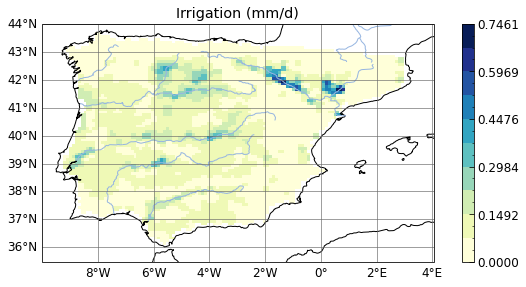

In [225]:
ds=ip_pres_irr
var='irrigation'

vmin = 0
vmax = 1
vmin, vmax = None, None
# vmax=None

title=None
# title='off'

# clabel="Share of surface withdrawals (%)"
clabel=None

cmap=wet

map_ave(ds, var, vmin=vmin, vmax=vmax, title=title, clabel=clabel, cmap=cmap, poly=None)

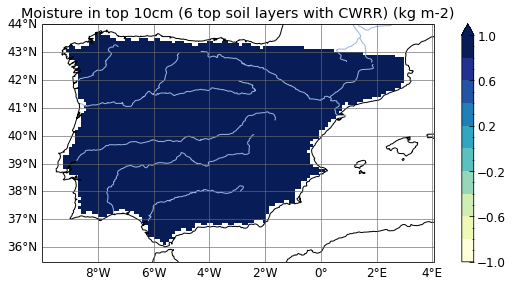

In [ ]:
ds=ip_pres_noirr
var='mrsos'

vmin = -1
vmax = 1
# vmin, vmax = None, None
# vmax=None

title=None
# title='off'

# clabel="Share of surface withdrawals (%)"
clabel=None

cmap=wet

map_ave(ds, var, vmin=vmin, vmax=vmax, title=title, clabel=clabel, cmap=cmap, poly=None)

No significance mask applied


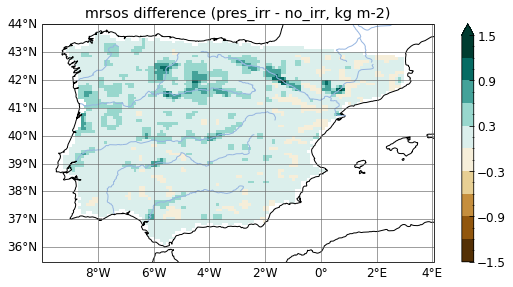

In [ ]:
#diff
ds1=ip_pres_irr
ds2=ip_pres_noirr
var='mrsos'
vmax= 1.5
vmin=-1.5
# vmin, vmax=None, None

title=None
# title='off'

cmap=emb_neutral

clabel=None

map_diff_ave(ds1, ds2, var,cmap=cmap, title=title, clabel=clabel, vmin=vmin, vmax=vmax)

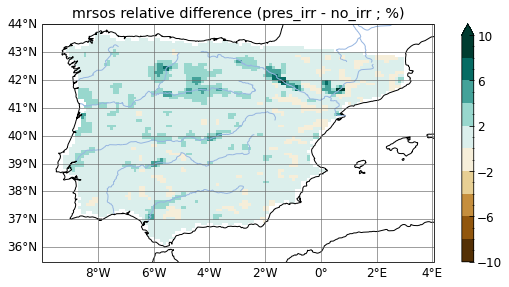

In [ ]:
#relative difference
ds1=ip_pres_irr
ds2=ip_pres_noirr
var='mrsos'
vmax= 10
vmin=-10
# vmin, vmax=None,None

title='off'
title=None

# clabel='Slow reservoir difference (%)'
clabel=None

map_rel_diff_ave(ds1, ds2, var,cmap=emb_neutral, title=title, clabel=clabel, vmin=vmin, vmax=vmax)

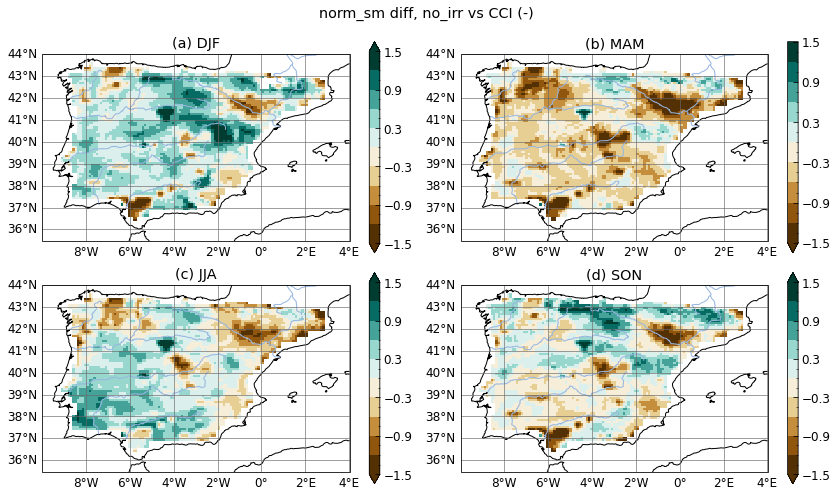

In [ ]:
#map for 4 seasons
var='norm_sm'
ds1=normalize_sm(ip_pres_noirr, 'mrsos', '2010-01-01', '2019-12-31')
ds2=normalize_sm(ip_cci_iORC, 'sm', '2010-01-01', '2019-12-31')
max_value= 1.5
min_value=-1.5
# min_value,max_value=None, None
cmap=emb_neutral

diff=ds1[var]-ds2[var]
title='{} diff, {} vs {} ({})'.format( var, ds1.attrs['name'], ds2.attrs['name'], ds1[var].attrs['units'])
plotvar=diff

map_seasons(plotvar, cmap=cmap, vmin=min_value, vmax=max_value, title=title, hex=False)

# Time series

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/xarray/groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


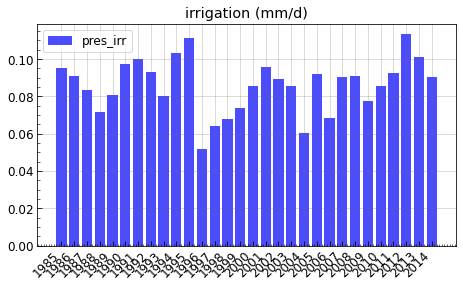

In [261]:
var='irrigation'

ds1=ip_pres_noirr
ds2=ip_pres_irr

# ds2=ip_fut_noirr
# ds2=ip_fut_irr

# ds2=ip_cci_iORC
# ds1=ip_gleam_iORC
# ds3=ip_pres_irr

# ds1=normalize_sm(ip_pres_noirr, 'mrsos', '2010-01-01', '2022-12-31')
# ds2=normalize_sm(ip_cci_iORC, 'sm', '2010-01-01', '2022-12-31')

# ds_list=[ds3]
ds_list=[ds2]#, ds2]#, ds3]

year_min = 1985
year_max = 2100

# title='off'
title=None

vmin=0
vmax=570
vmin, vmax= None, None

# time_series_ave(    ds_list, var, ds_colors=True, year_min=year_min, year_max=year_max, title=title)
# seasonal_cycle_ave( ds_list, var, ds_colors=True, vmin=vmin, vmax=vmax,year_min=year_min, year_max=year_max, title=title)
annual_bars_ave(ds_list, var, ds_colors=True,vmin=vmin, vmax=vmax, year_min=year_min, year_max=year_max, title=title, legend_out=None)
# annual_ts_ave(ds_list, var, ds_colors=True, vmin=vmin, vmax=vmax,year_min=year_min, year_max=year_max, title=title, legend_out=None)

In [ ]:
ds_list=[ds1, ds2, ds3]

year_min = 2010
year_max = 2022

# title='off'
title=None

# ylabel="Irrigation (mm d⁻¹)"
time_series_ave(ds_list, var, ds_colors=True, year_min=year_min, year_max=year_max, title=title)
seasonal_cycle_ave(ds_list, var, ds_colors=True, year_min=year_min, year_max=year_max, title=title)
plt.grid()

NameError: name 'ds3' is not defined

In [ ]:
# multiple variables

varlist=['mrsos', 'humtot']
varlist=['streamr', 'slowr', 'fastr']

ds1=ip_pres_noirr
ds1=ip_long_noirr

year_min = 2007
year_max = 2022

# title='off'
title=None

fig = plt.figure(figsize=(7.5, 4))
ax = plt.axes()

for var in varlist:
    plotvar=ds1[var].mean(dim=['lon', 'lat'])
    nice_time_plot(plotvar, ax)
plt.legend()